## Do democratic governments with different ideology differ in economic indicators?

Code written by Ivan Bielik

The code was used in the analysis for the research article about the differences in economic performance of governments filtered by their prevailing ideology.

The main assumption driving the analysis is the idea that left-wing governments are usually bigger spenders than so called "fiscal responsible" right-wing governments. I wanted to test if such assumption holds in the face of empirical evidence.

The main line of analysis is:
- prepare and clean the dataset
- visually explore relevant metrics
- test for normality of data
- conduct non-parametric test of means

In [1]:
# import needed modules and prepare data for the analysis

import numpy as np
import pandas as pd

# ttest needed for computation of difference of means
from scipy.stats import ttest_ind, levene

# Nonparametric Statistical Significance Test
from permute.core import two_sample

# packages for visualisation of data
%matplotlib inline
import seaborn as sns
sns.set()

# read data into dataframe
file = "article_data.csv"
df = pd.read_csv(file)

# add new column into df that shows government ideology based on gov_party
def gov_ideology(row):
    if row['gov_party'] < 3:
        return "Right"
    elif row['gov_party'] == 3:
        return "Center"
    else:
        return "Left"

# add new column, gov_ideology, into dataset    
df['gov_ideology'] = df.apply(gov_ideology, axis=1).astype('category')

# prepare two list of values through which the tests will iterate
var_list = ['realgdpgr', 'inflation', 'unemp_1dif', 'deficit', 'debt_1dif']
country_list = ['Czech Republic', 'Hungary', 'Lithuania', 'Poland', 'Slovakia', 'Slovenia']

df.head()

country  year  gov_party  realgdpgr  inflation   debt  deficit  \
0  Czech Republic  1993          1      -0.94      20.81    NaN      NaN   
1  Czech Republic  1994          1       2.62      10.04    NaN      NaN   
2  Czech Republic  1995          1       5.94       8.99  18.18   -12.44   
3  Czech Republic  1996          1       4.16       8.76  16.77    -3.02   
4  Czech Republic  1997          1      -0.62       8.60  17.15    -3.19   

   unemp  debt_1dif  unemp_1dif gov_ideology  
0    4.2        NaN         NaN        Right  
1    4.2        NaN         0.0        Right  
2    3.9        NaN        -0.3        Right  
3    3.8      -1.41        -0.1        Right  
4    4.7       0.38         0.9        Right

In [2]:
# how many missing values are in each column?
df[var_list].isnull().sum()

realgdpgr      2
inflation      8
unemp_1dif    16
deficit       12
debt_1dif     20
dtype: int64

In [3]:
# filter dataset by Left and Right and by relevant countries for the analysis

df_filtered = df[df.gov_ideology.isin(['Left', 'Right']) & df.country.isin(country_list)]

I had to eliminated rows containing data from Estonia and Latvia, because there was no left-wing government in the office (case of Latvia) or only two observations in the dataset (case of Estonia) that did not even qualify for a full-fledged government in the office. 

## Boxplot visualisations of selected variables

### gov_ideology vs. Growth of real GDP

Boxplot graph for every country split by the government ideology

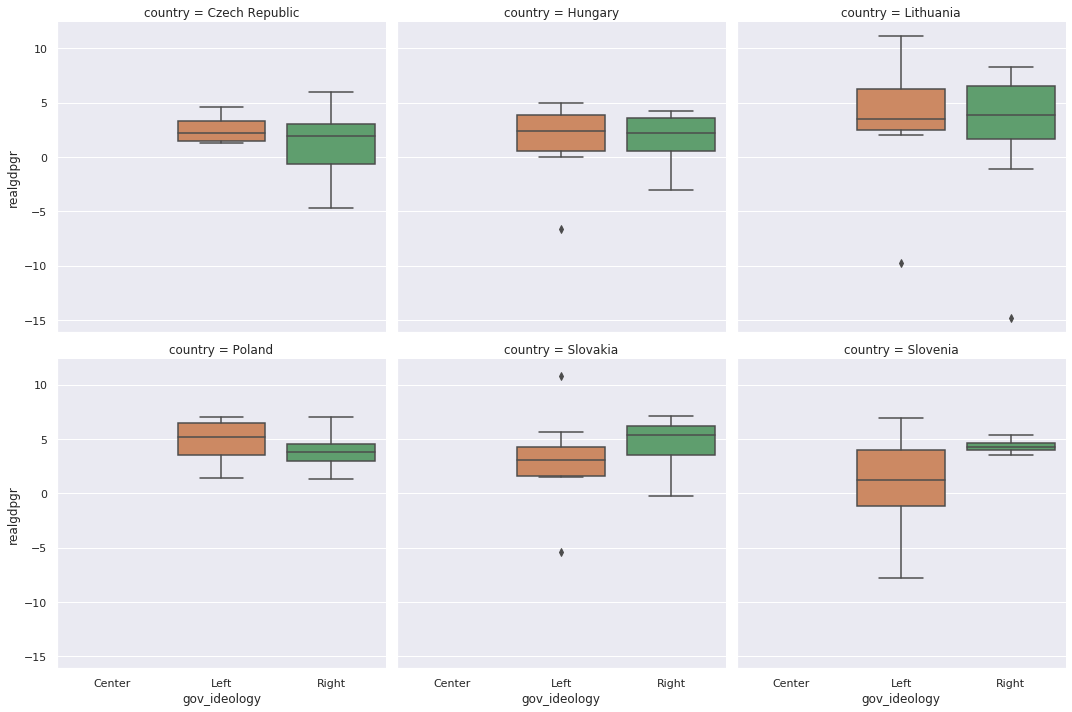

In [4]:
sns.catplot(x="gov_ideology", y="realgdpgr", 
            col='country', col_wrap=3, kind='box', 
            data=df_filtered)
#gov_growth.savefig("gov_vs_growth.png")

### gov_ideology vs. inflation

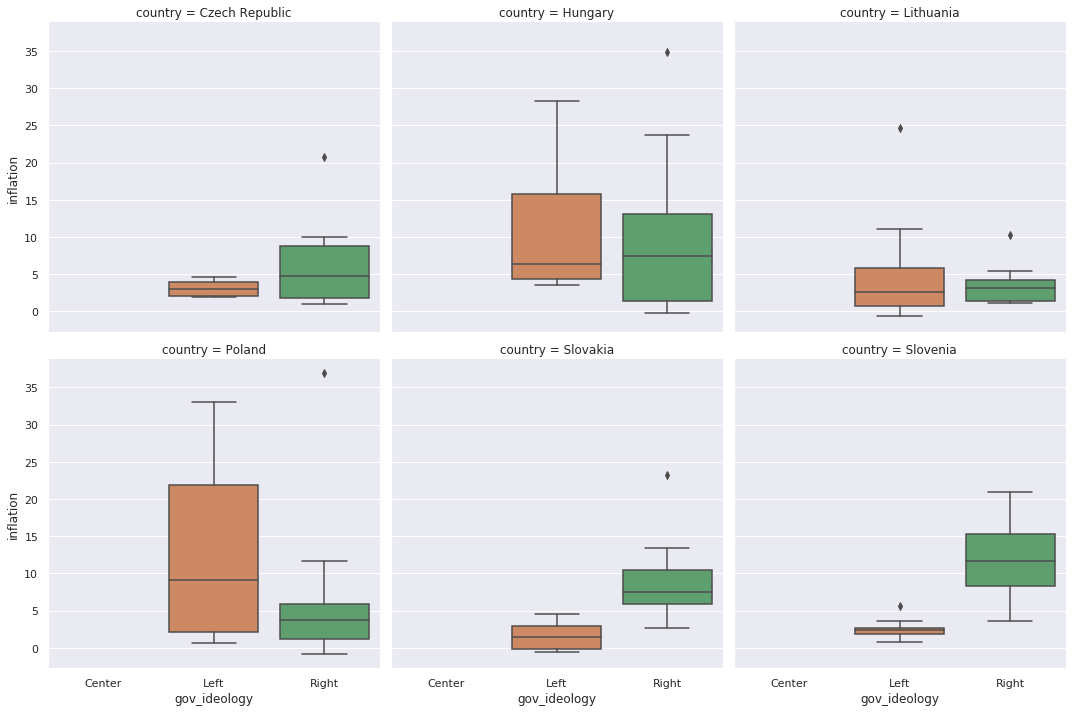

In [5]:
sns.catplot(x="gov_ideology", y="inflation", 
            col='country', col_wrap=3, kind='box', 
            data=df_filtered)

### gov_ideology vs. unemployment

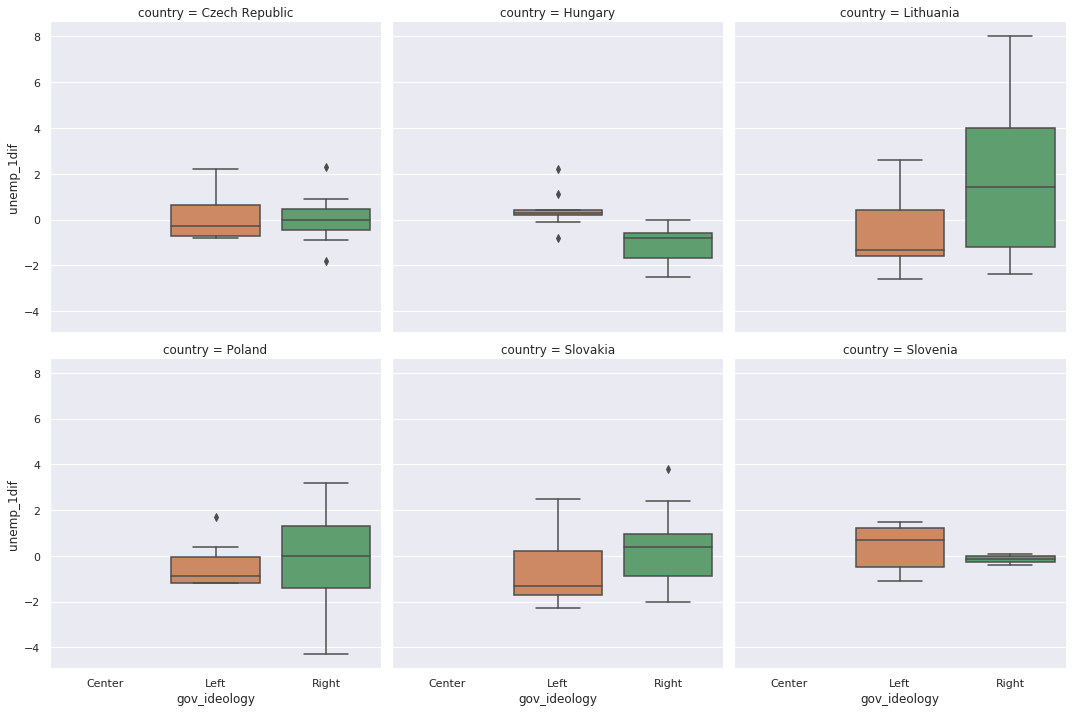

In [6]:
sns.catplot(x="gov_ideology", y="unemp_1dif", 
            col='country', col_wrap=3, kind='box', 
            data=df_filtered)

### gov_ideology vs. deficit

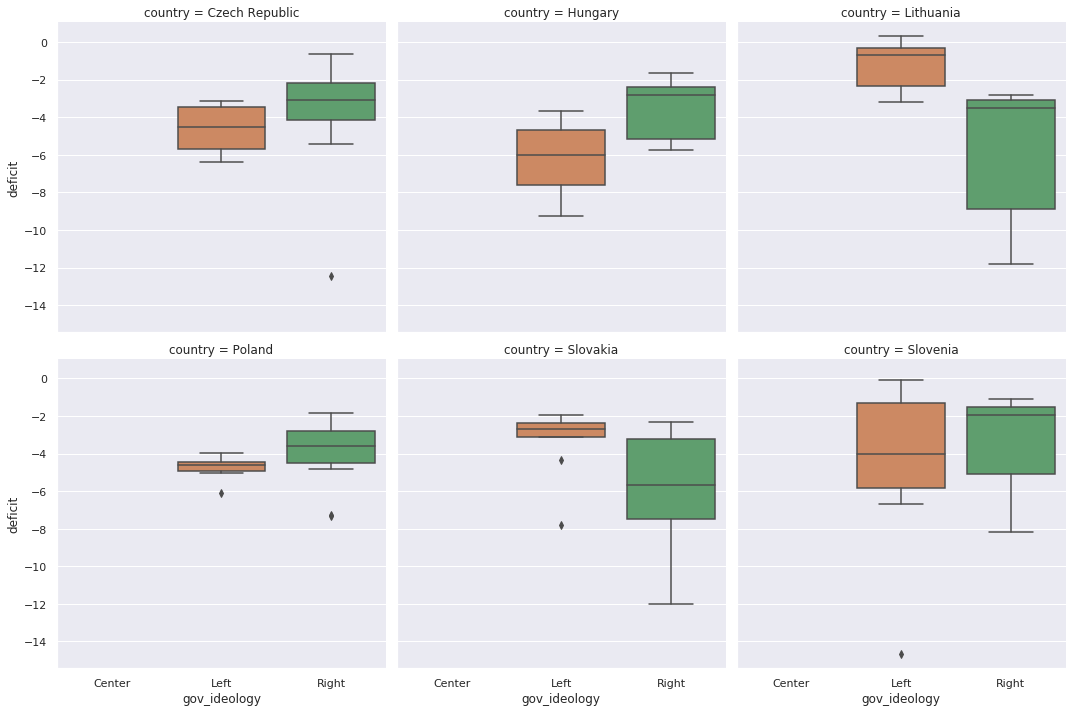

In [7]:
sns.catplot(x="gov_ideology", y="deficit", 
            col='country', col_wrap=3, kind='box', 
            data=df_filtered)

### gov_ideology vs. debt

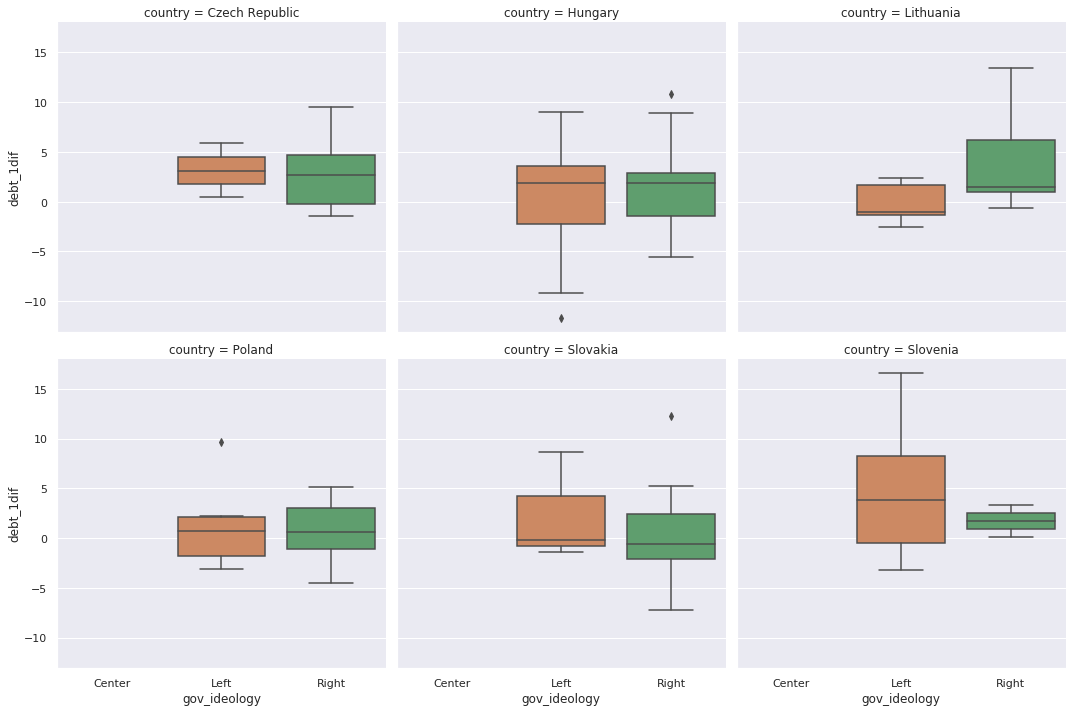

In [8]:
sns.catplot(x="gov_ideology", y="debt_1dif", 
            col='country', col_wrap=3, kind='box', 
            data=df_filtered)

## Summary table of means and standard deviations per each country

In [9]:
# create summary table by country with mean and std for each column
summary_table = df.pivot_table(var_list, 
                               index=['country', 'gov_ideology'], aggfunc=(np.mean, np.std))

summary_table

debt_1dif              deficit            \
                                 mean        std      mean       std   
country        gov_ideology                                            
Czech Republic Center       -0.970000   2.396992 -2.576250  2.286850   
               Left          3.152500   2.315130 -4.637500  1.533936   
               Right         2.740000   3.790076 -3.883000  3.322232   
Estonia        Center       -0.135000   1.294005 -0.863333  2.244467   
               Left         -1.105000   0.176777  0.700000  2.064752   
               Right         0.134118   1.907295  0.472353  1.508536   
Hungary        Center        0.037500   1.539705 -7.417500  2.076975   
               Left          0.023000   6.326964 -6.244000  1.911621   
               Right         1.714545   4.738450 -3.521667  1.508599   
Latvia         Center        3.450000  10.677312 -6.500000  3.111270   
               Right         1.036842   5.115685 -1.665000  2.173834   
Lithuania      Center       -1.400000   0.519615 -1.533333  0.321455   
               Left         -0.155556   1.762180 -1.230000  1.292758   
               Right         3.800000   4.575751 -5.811111  3.425801   
Poland         Left          1.320000   4.599652 -4.775714  0.677812   
               Right         0.850667   2.838429 -3.940667  1.620223   
Slovakia       Center        1.385000   5.013387 -5.535000  2.750645   
               Left          2.035000   4.203366 -3.360000  1.930640   
               Right         0.300909   5.463284 -5.865833  3.029454   
Slovenia       Center        1.330000   3.493502 -3.047000  1.059696   
               Left          4.844444   6.830833 -4.542222  4.494896   
               Right         1.700000   2.262742 -3.746667  3.863384   

                             inflation            realgdpgr            \
                                  mean        std      mean       std   
country        gov_ideology                                             
Czech Republic Center         2.412500   3.507041  4.035000  2.428386   
               Left           3.120000   1.323631  2.587500  1.529736   
               Right          6.295833   5.705521  1.440000  3.067030   
Estonia        Center        11.550000  11.667262  3.146667  3.096164   
               Left           9.005000   0.374767  7.995000  5.253803   
               Right          3.372353   2.784191  3.581111  6.008880   
Hungary        Center        10.787500   6.885039  3.100000  1.753416   
               Left          10.719000   9.137301  1.662000  3.401878   
               Right         10.105833  11.204417  1.775455  2.483149   
Latvia         Center         1.500000   3.846661  1.220000  7.297342   
               Right          4.226111   3.998734  4.077619  5.782103   
Lithuania      Center         0.136667   1.128819  7.950000  2.245462   
               Left           5.493333   8.054150  3.540000  5.233507   
               Right          3.600000   2.958995  2.408889  7.105743   
Poland         Left          12.973750  12.857664  4.896250  1.946557   
               Right          5.788125   9.025454  3.803750  1.608920   
Slovakia       Center         2.720000   2.489016  6.745000  2.411234   
               Left           1.632500   1.907105  3.010000  4.529516   
               Right          8.638571   5.285844  4.649286  2.196891   
Slovenia       Center         7.645455   8.788516  3.517273  0.970630   
               Left           2.558889   1.392816  1.132222  4.565602   
               Right         11.975000   7.263078  4.327500  0.753851   

                            unemp_1dif            
                                  mean       std  
country        gov_ideology                       
Czech Republic Center        -0.175000  1.022252  
               Left           0.200000  1.392839  
               Right          0.036364  1.050974  
Estonia        Center         1.566667  1.011599  
               Left          -0.500000  0.14

## Conducting tests of normality of data

Levene test checks the homogeneity of data. Null hypothesis of the test is that the data is homogenous.

Threshold for passing the test is set to 0.05.

You can read more about the Levene test on Wikipedia or on this site - https://www.statisticshowto.datasciencecentral.com/levene-test/

In [10]:
# check assumption of homogeneity of variances
# levene test, H0 = there is homogeneity of variances
# if H1 is valid, data are not homogenous in variance

gov_left = df.loc[df['gov_ideology'] == "Left"]
gov_right = df.loc[df['gov_ideology'] == "Right"]

for i in var_list:
    a = gov_left[i].values
    b = gov_right[i].values
    a = a[~np.isnan(a)]
    b = b[~np.isnan(b)]
    w, p = levene(a, b, center="median")
    print('Variable: {0}, W = {1:.3f}, p = {2:.3f}'.format(i, w, p))

Variable: realgdpgr, W = 0.106, p = 0.745
Variable: inflation, W = 0.432, p = 0.512
Variable: unemp_1dif, W = 3.830, p = 0.052
Variable: deficit, W = 0.007, p = 0.935
Variable: debt_1dif, W = 1.573, p = 0.212


All selected variables failed to reject the null hypothesis, thus we can assume that the variances are equal. The assumption of homogeneity of variances is fulfilled and t-test can be applied on the data.

### Non-parametric test

Data for each country, however, suffers from a small number of observations. Thus, I need to use non-parametric test of means.

Two sample permutation test is used instead of a normal independent samples t-test. It simulates normal distribution of t-test statistics through random sampling. Number of repetitions per each variable in each country is ten thousand. 

Null hypothesis of the two sample test is that means of two compared groups are the same. Threshold for p-value is set to below 0.05 in order to reject null hypothesis.

In [11]:
# nonparametric test of two samples, using permutations with random sampling

for state in country_list:
    print(state)
    nation = df.loc[df['country'] == state]
    gov_left = nation.loc[nation['gov_ideology'] == "Left"]
    gov_right = nation.loc[nation['gov_ideology'] == "Right"]
    print('Left data: {}, Right data: {}'.format(len(gov_left), len(gov_right)))
    for i in var_list:
        a = gov_left[i].values
        b = gov_right[i].values
        a = a[~np.isnan(a)]
        b = b[~np.isnan(b)]
        p, t = two_sample(a, b, reps=10000, stat='t', alternative='two-sided')
        print('Variable "{0}" nonparametric test: t = {1:.5f}, p = {2:.5f}'.format(i, t, p))

Czech Republic
Left data: 4, Right data: 12
Variable "realgdpgr" nonparametric test: t = 0.70747, p = 0.50455
Variable "inflation" nonparametric test: t = -1.07976, p = 0.24718
Variable "unemp_1dif" nonparametric test: t = 0.24606, p = 0.77212
Variable "deficit" nonparametric test: t = -0.42831, p = 0.61214
Variable "debt_1dif" nonparametric test: t = 0.19892, p = 0.83392
Hungary
Left data: 10, Right data: 12
Variable "realgdpgr" nonparametric test: t = -0.08790, p = 0.92931
Variable "inflation" nonparametric test: t = 0.13869, p = 0.87911
Variable "unemp_1dif" nonparametric test: t = 3.72418, p = 0.00080
Variable "deficit" nonparametric test: t = -3.73602, p = 0.00120
Variable "debt_1dif" nonparametric test: t = -0.69782, p = 0.48955
Lithuania
Left data: 11, Right data: 9
Variable "realgdpgr" nonparametric test: t = 0.41009, p = 0.68993
Variable "inflation" nonparametric test: t = 0.66197, p = 0.62834
Variable "unemp_1dif" nonparametric test: t = -2.01919, p = 0.06319
Variable "defici

### Summary

Only in a small number of variables the ideology of the government has mattered. Mostly, the differneces in means between various leaning governments are influenced only by chance and are not statistically significant.

The assumption from the beginning of the analysis is, therefore, only slightly valid and cannot be generalised on every economic indicator of the government. Left-leaning governments do not usually ruin the country's economy and they are able to be fiscally responsible as well as their right-leaning counterparts.